### TSMC2330 Stock Price Estimate

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ta import add_all_ta_features
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 讀取資料

In [ ]:
# 🔹 讀取資料
df = pd.read_csv("/content/drive/MyDrive/2025_tvdi_ML/tsmc2330-1.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# 🔍 查看資料結構
df.head()

,Column1,Date,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
0,19,2020-02-07,298.235036,298.686908,294.620066,296.427551,28798327,-1.35,294.258600,295.071942,299.997342,-1.807485,43.065737,-1.508643,-1.431600,315.071159,284.923525,0
1,20,2020-02-10,290.553192,296.427518,290.101321,295.975647,30632424,-0.15,296.517938,294.439319,299.477689,5.422455,41.044731,-1.420512,-1.429362,314.341801,284.613577,0
2,21,2020-02-11,298.686925,300.494410,298.235054,299.590668,27524935,1.22,297.692786,294.303763,299.116191,0.903743,42.753644,-1.092871,-1.361563,313.574510,284.657872,1
3,22,2020-02-12,301.398109,303.657466,300.946238,302.753723,37612639,1.06,299.048401,294.484512,299.251747,1.355614,41.911724,-0.610923,-1.210544,313.797212,284.706282,1
4,23,2020-02-13,305.464950,305.464950,302.753723,302.753723,22757021,0.00,299.500262,296.156436,299.500276,-2.711227,45.967695,-0.229394,-1.013383,314.109803,284.890749,0


### 特徵工程：加入技術指標 (MA5, MA10, MA20, BSI BB band.), 將漲、跌欄位改為 0(跌), 1(漲)，並放在最後一欄顯示

In [ ]:
#  選擇特徵與目標變數
features = df.drop(columns=["Column1", "Date", "Target", "Close"])  # Adj Close 可忽略
X = features
y = df["Target"]

# 📊 分割訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)


In [ ]:
#  回歸樹模型
tree_model = DecisionTreeClassifier(max_depth=5, random_state=0)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("📘 回歸樹準確率：", accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

📘 回歸樹準確率： 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       197

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388



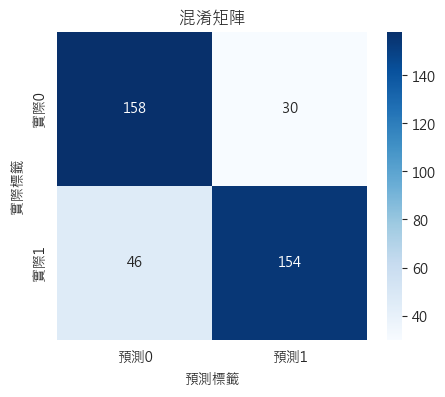

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 先設定 matplotlib 的中文字型（以 Windows 微軟正黑體為例）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 或 'SimHei'，視你系統字型而定
plt.rcParams['axes.unicode_minus'] = False  # 讓負號正常顯示

# 2. 在設定 seaborn 風格時，再指定字型（必須在 import seaborn 後執行）
sns.set_style("whitegrid", {"font.sans-serif": ['Microsoft JhengHei', 'Arial']})

# 3. 混淆矩陣數據
cm = np.array([[158, 30],
               [46, 154]])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['預測0', '預測1'], yticklabels=['實際0', '實際1'])
plt.xlabel('預測標籤')
plt.ylabel('實際標籤')
plt.title('混淆矩陣')
plt.show()


In [ ]:
# 🌲 隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("📗 隨機森林準確率：", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

📗 隨機森林準確率： 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       197

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388



In [ ]:
# 📈 邏輯迴歸模型
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("📙 邏輯迴歸準確率：", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

📙 邏輯迴歸準確率： 0.7860824742268041
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       191
           1       0.78      0.81      0.79       197

    accuracy                           0.79       388
   macro avg       0.79      0.79      0.79       388
weighted avg       0.79      0.79      0.79       388



In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# 混淆矩陣數值
cm = np.array([[158, 30],
               [46, 154]])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['預測0', '預測1'], yticklabels=['實際0', '實際1'])
plt.xlabel('預測標籤')
plt.ylabel('實際標籤')
plt.title('混淆矩陣')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# 💡 XGBoost 模型
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("📕 XGBoost 準確率：", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

📕 XGBoost 準確率： 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       197

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388



d:\Github\Python-2025_04_25\MLOPS\mlops_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


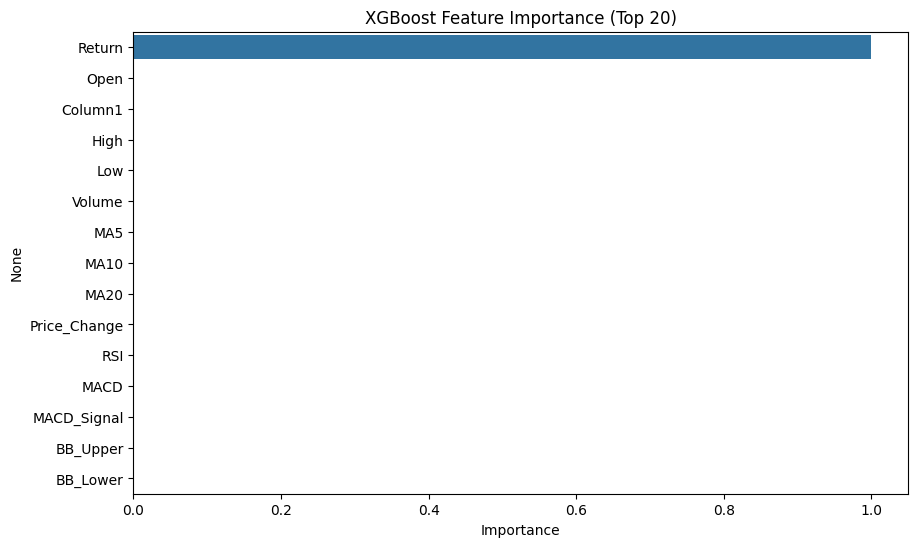

In [ ]:
# 📊 特徵重要性分析 (以 XGBoost 為例)
xgb_importance = pd.Series(
    xgb_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance[:20], y=xgb_importance.index[:20])
plt.title("XGBoost Feature Importance (Top 20)")
plt.xlabel("Importance")
plt.show()

d:\Github\Python-2025_04_25\MLOPS\mlops_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:41:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


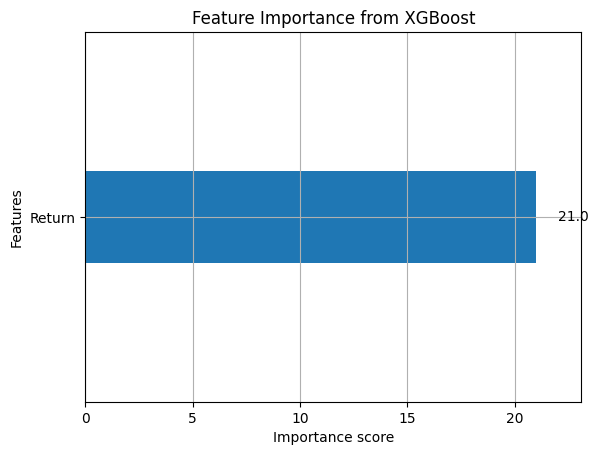

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# 顯示特徵重要性
xgb.plot_importance(xgb_model, max_num_features=15, height=0.5)
plt.title("Feature Importance from XGBoost")
plt.show()